# Q-Learning

this notebook are implementation of Q-learning algorithm to determine optimum policy until the agent that on start point (1,1) able to find the goal on (15,15) by getting total maximum reward at the grid world. The data can be seen in the file DataTugas3ML2019.txt. In this case, agent has four actions: N, E, S, dan W which sequentially states North (upward), East (to the right), South (downward), dan West (to the left).

## Tools

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import math

## The Data

### Reward Table

In [2]:
data = pd.read_csv("DataTugas3ML2019.txt", sep='\t', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1,-2,-3,-2,-3,-3,-4,-1,-4,-2,-1,-2,-3,-3,500
1,-1,-3,-1,-2,-4,-1,-4,-1,-4,-2,-4,-2,-2,-2,-1
2,-4,-2,-1,-4,-2,-1,-2,-4,-2,-3,-2,-1,-2,-4,-4
3,-4,-2,-4,-1,-3,-2,-3,-2,-4,-2,-4,-1,-2,-4,-2
4,-4,-2,-2,-3,-2,-3,-1,-1,-4,-2,-1,-3,-4,-2,-4
5,-4,-3,-3,-4,-2,-3,-4,-2,-2,-1,-1,-2,-1,-2,-1
6,-2,-3,-2,-1,-1,-3,-2,-1,-4,-3,-1,-1,-2,-3,-3
7,-3,-1,-1,-4,-4,-3,-1,-2,-3,-1,-1,-4,-4,-3,-3
8,-3,-1,-4,-2,-3,-3,-1,-4,-4,-4,-2,-2,-2,-2,-1
9,-3,-4,-4,-2,-3,-4,-3,-3,-2,-2,-3,-4,-3,-4,-1


In [3]:
n_data = data.shape[0] * data.shape[1]
n_data

225

### ID Table

this table for labelling each point in grid world

In [4]:
id_data = []
j = 0
for i in range(15):
  id_data.append([i for i in range(j,j+15)])
  j+=15
id_data = pd.DataFrame(data=id_data)
id_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
2,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
3,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
4,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
5,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
6,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104
7,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
8,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134
9,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149


## Q Table (4 x 225)

0 : North, 1 : South, 2 : West, 3 : East

In [5]:
q_table = []
for i in range(4):
    temp = []
  
    for j in range(n_data):
    
        position = np.where(id_data==j)
        x = int(position[1])
        y = int(position[0])
    
        if y == 0 and i == 0:
            value = "-inf"
        elif y == 14 and i == 1:
            value = "-inf"
        elif x == 0 and i == 2:
            value = "-inf"
        elif x == 14 and i == 3:
            value = "-inf"
        else:
            value = 0
        temp.append(float(value))
    
    q_table.append(temp)

In [6]:
qsa = pd.DataFrame(q_table)
qsa

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
2,-inf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-inf


## Q-Learning Algorithm

### Functions

In [7]:
def movement(state):
    position = np.where(id_data==state)
    x = position[1]
    y = position[0]
  
    while True:
        direction = random.randint(0, 3)
        if direction == 0 and y != 0:
            break
        elif direction == 1 and y != 14:
            break
        elif direction == 2 and x != 0:
            break
        elif direction == 3 and x != 14:
            break
    return direction

In [8]:
def rate_update(learning_rate, iteration, episode):
    return learning_rate * math.exp(-1 * (iteration / episode))

### Parameters

### Learning Rate and Gamma

In [9]:
learning_rate = 1
gamma = 0.99

### Number of Episodes and Steps

In [10]:
episode = 300
step = 30
max_step = step * 30

### Algorithm

In [11]:
for i in range(episode):
    x = 0
    y = 14
    state = id_data[x][y]
    steps = random.randint(step, max_step)
  
    for j in range(steps):
        if random.random() < rate_update(learning_rate, i, episode):
            #exploration
            action = movement(state)
        else:
            #exploitation
            action = np.argmax(qsa[state])

        if action == 0:
            xnext = x
            ynext = y - 1

        elif action == 1:
            xnext = x
            ynext = y + 1

        elif action == 2:
            xnext = x - 1
            ynext = y

        elif action == 3:
            xnext = x + 1
            ynext = y

        qsa[state][action] = qsa[state][action] + rate_update(learning_rate, i, episode) * (data[xnext][ynext] + gamma * np.max(qsa[id_data[xnext][ynext]]) - qsa[state][action])

        x = xnext
        y = ynext

        if x == 14 and y == 0:
            break

        state = id_data[x][y]

/Users/maxalminasatriakahfi/anaconda3/envs/ds/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


## Evaluate

### Q-Table After Learning

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(qsa)

            0           1           2           3           4           5  \
0        -inf        -inf        -inf        -inf        -inf        -inf   
1  207.232113  351.479233  409.238196  358.433684  421.941924  431.020853   
2        -inf  315.239335  349.816221  394.318491  408.398659  427.263850   
3  356.720699  384.065958  392.719396  425.837781  434.617733  442.038136   

            6           7           8           9          10          11  \
0        -inf        -inf        -inf        -inf        -inf        -inf   
1  436.587664  445.038136  449.523572  458.104619  464.653631  473.387506   
2  434.617642  442.038134  450.543572  456.104619  464.752140  471.466808   
3  450.543572  456.104619  464.752140  471.466808  477.239200  484.080000   

         12      13   14          15          16          17          18  \
0      -inf    -inf -inf  166.618258  357.664998  359.069087  414.839430   
1  480.1894  487.06  0.0  381.204016  397.805192  404.096770  408.522190   


### Score

In [13]:
xmove = 0
ymove = 14

score = 0
i = 0

path = []

s = []

while i < 1000:
    state = id_data[xmove][ymove]
  
    s.append(state)
  
    score += data[xmove][ymove]
    path.append([xmove, ymove])
  
    move = np.argmax(qsa[id_data[xmove][ymove]])
    if move == 0:
        ymove -= 1
    elif move == 1:
        ymove += 1
    elif move == 2:
        xmove -= 1
    elif move == 3:
        xmove += 1
  
    if xmove == 14 and ymove == 0:
        score += data[xmove][ymove]
        path.append([xmove, ymove])
        break
    
    i += 1
print('Score:', score)

Score: 453


### Path

visualize path that get the maximum rewards

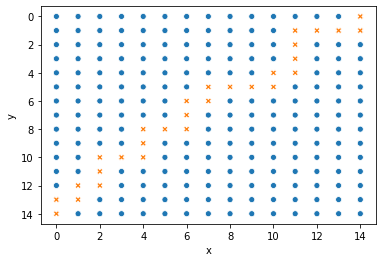

In [14]:
points = []
status = []
for i in range(15):
    for j in range(15):
        points.append([i,j])
        if [i,j] in path:
            status.append(True)
        else:
            status.append(False)

points = pd.DataFrame(points, columns=['x','y'])
points['path'] = status
plt.gca().invert_yaxis()
sns.scatterplot(x='x', y='y', hue='path', style='path', data=points)
plt.legend().remove()